# Introduction to Altair: Composition (2/3)

When visualizing a number of different data fields, we might be tempted to use as many visual encoding channels as we can: `x`, `y`, `color`, `size`, `shape`, and so on. However, as the number of encoding channels increases, a chart can rapidly become cluttered and difficult to read. An alternative to "over-loading" a single chart is to instead _compose multiple charts_ in a way that facilitates rapid comparisons.

In this notebook, we will examine a variety of operations for _multi-view composition_:

- _layer_: place compatible charts directly on top of each other,
- _facet_: partition data into multiple charts, organized in rows or columns,
- _concatenate_: position arbitrary charts within a shared layout
- _repeat_: take a base chart specification and apply it to multiple data fields.

_This notebook is part of [the Vega-Lite + Altair Workshop at ODSC East 2019](https://github.com/vega/vega-lite-tutorials/tree/master/odsc2019)._

_Acknowledgement:_ This series  of notebook-based workshop is an adaption from the University of Washington's [Data Visualization Curriculum](https://github.com/uwdata/visualization-curriculum), with examples from the [Vega-Lite presentation video from OpenVisConf 2017](https://www.youtube.com/watch?v=9uaHRWj04D4) for a short workshop (60-90 minutes).

# Import Libraries and Data

In [3]:
import pandas as pd
import altair as alt

Again, we will use the Seattle Weather data for this part of the tutorial. 

In [30]:
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temperature,wind,weather
0,2012/01/01,0.0,12.8,4.7,drizzle
1,2012/01/02,10.9,10.6,4.5,rain
2,2012/01/03,0.8,11.7,2.3,rain
3,2012/01/04,20.3,12.2,4.7,rain
4,2012/01/05,1.3,8.9,6.1,rain


## Facet

As we saw a `row`/`column` encoding in the previous notebook:

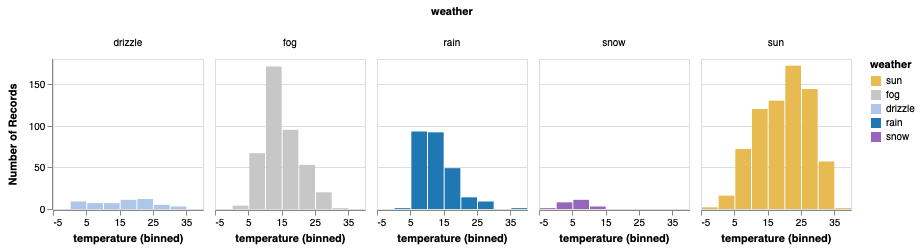

In [32]:
alt.Chart(df).mark_bar().encode(
  x=alt.X('temperature', bin=True), 
  y="count()", 
  color=alt.Color("weather", scale=alt.Scale(
    domain=["sun", "fog", "drizzle", "rain", "snow"],
    range=["#e7ba52", "#c7c7c7", "#aec7e8", "#1f77b4", "#9467bd"]
  )),
  column="weather"
).properties(width=150,height=150)

This is in fact a short cut for a `facet` composition method.

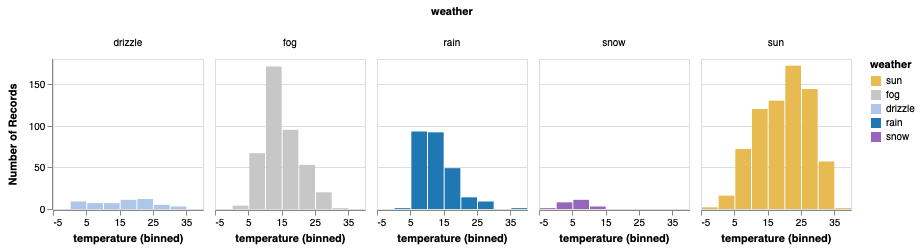

In [35]:
alt.Chart(df).mark_bar().encode(
  x=alt.X('temperature', bin=True), 
  y="count()", 
  color=alt.Color("weather", scale=alt.Scale(
    domain=["sun", "fog", "drizzle", "rain", "snow"],
    range=["#e7ba52", "#c7c7c7", "#aec7e8", "#1f77b4", "#9467bd"]
  ))
).properties(
  width=150,height=150
).facet(column="weather")

We will see layer in this notebook that the facet method can be useful on its own too. 

## Layer

One of the most common ways of combining multiple charts is to *layer* marks on top of each other.



Let's start from a plot showing monthly precipitation.

Note that we can assign a Chart object to a variable and call it to display. 

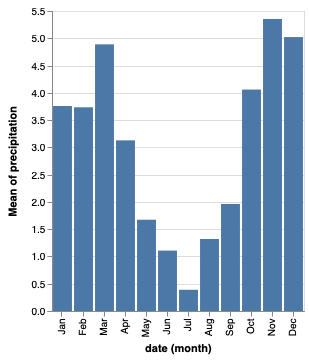

In [36]:
monthly_precip = alt.Chart(df).mark_bar().encode(x="month(date):O", y="mean(precipitation)")
monthly_precip

If we want to add a layer showing overall mean for any month, we can make another plot with a rule mark and without x-encoding.

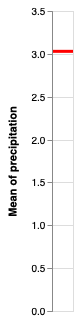

In [28]:
overall_precip = alt.Chart(df).mark_rule(color="red", size=3).encode(y="mean(precipitation)")
overall_precip

We can then combine the two plots with `+` operator to layer plots.  

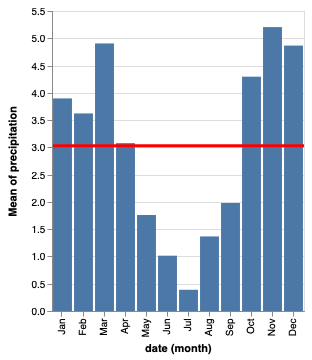

In [29]:
monthly_precip + overall_precip

This `+` operator is a short form of the `alt.layer()` method. 

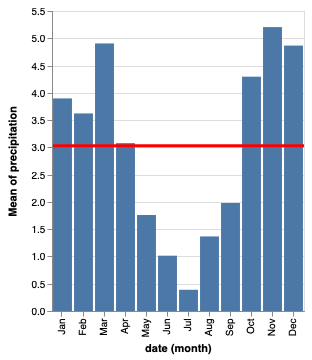

## Concatenate

Instead of layering overall precipitation mean, we can concatenate a plot of monthly temperature instead. 

First, we can declare the monthly temperature plot.

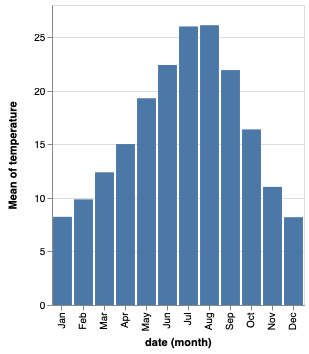

In [38]:
monthly_temp = alt.Chart(df).mark_bar().encode(x="month(date):O", y="mean(temperature)")
monthly_temp

We can then use the `&` operator as a shortcut for `alt.vconcat()` (vertical concat) or `|` for `alt.hconcat()` (horizontal concat)

## Repeat

A recurring pattern  is that many of the concatenated plots are the same chart with different fields. 
Thus, we also provide the `repeat` operator as a convenient shortcut for this common case. 

Let's recreate our concatenation example above using the `repeat` operator: 

- To create a template specification, we can use the *repeater variable* `alt.repeat('column')` as our y-axis field. This code simply states that we want to use the variable assigned to the `column` repeater, which organizes repeated charts in a horizontal direction. (As the repeater provides the field name only, we have to specify the field data type separately as `type='quantitative'`.)

- We then invoke the `repeat` method, passing in data field names for each column

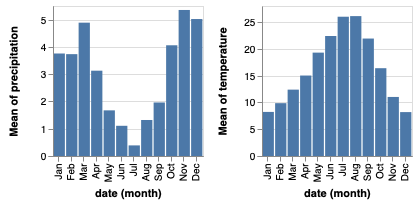

In [46]:
alt.Chart(df).mark_bar().encode(
    x="month(date):O", 
    y=alt.Y(alt.repeat('column'), aggregate="mean", type="quantitative")
).properties(
    width=150, height=150
).repeat(
    column=['precipitation', 'temperature']
)

We can easily add another quantitative variable such as "wind":

In [42]:
# Modify:
# alt.Chart(df).mark_bar().encode(
#     x="month(date):O", 
#     y=alt.Y(alt.repeat('column'), aggregate="mean", type="quantitative")
# ).properties(
#     width=150, height=150
# ).repeat(
#   column=['precipitation', 'temperature']
# )

Or take it further to create a scatter plot matrix

In [48]:
# TODO: add scatterplot matrix
# Hint: Use point mark with two repeater variables and then repeat both row and column.

# A View Composition Algebra

Together, the composition operators `layer`, `facet`, `concat`, and `repeat` form a *view composition algebra*: the various operators can be combined to construct a variety of multi-view visualizations.

As an example, let's start with the same layered chart above:

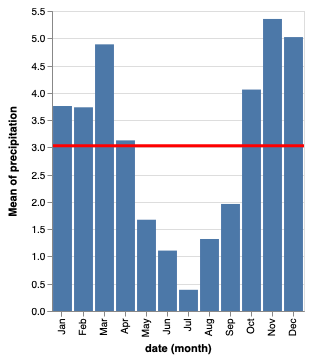

In [53]:
alt.layer(monthly_precip, overall_precip)

Let's try to see how to facet this plot by weather type



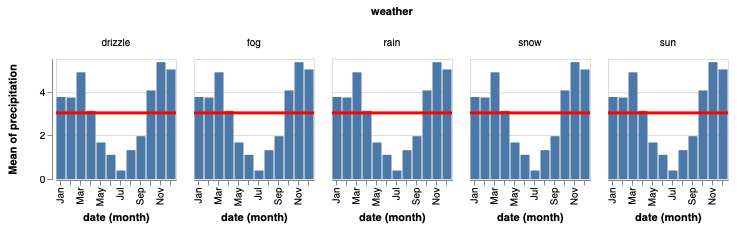

In [59]:
alt.layer(monthly_precip, overall_precip).properties(
    width=120, height=120
).facet(data=df, column='weather:O')

Focusing only on the multi-view composition operators, the model for the visualization above is:

```
facet(column="weather")
|- layer
   |- monthly_precip
   |- overal_precip
```